<a href="https://colab.research.google.com/github/irbaadika/PCVK_Genap_2023/blob/main/Leaf_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS BESAR PCVK**

## LEAF CLASSIFICATION

TI - 3B<br>
Irba Adika Jaya / 09<br>
Rijal Ammar Irsyadul Ibad / 15

In [1]:
# Import Library

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Drive

from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [46]:
# Load image dari drive lalu resize image menjadi setengah dari image asli, 
# kemudian image dijadikan array

def load_image(array_image, path, color):
  for img in glob.glob(path):
    n = cv.imread(img, color)
    scale_percent = 50 # percent of original size
    width = int(n.shape[1] * scale_percent / 100)
    height = int(n.shape[0] * scale_percent / 100)
    dim = (width, height)
    n = cv.resize(n, dim)
    array_image.append(n)
  return array_image

In [47]:
# Load All Images

leaf1 = []
leaf2 = []
leaf3 = []
all_image = [leaf1, leaf2, leaf3]

path_leaf1 = '/content/drive/MyDrive/ASSETS-PVCK/Images/Leaf/Acer_Capillipes/*.jpg'
path_leaf2 = '/content/drive/MyDrive/ASSETS-PVCK/Images/Leaf/Acer_Circinatum/*.jpg'
path_leaf3 = '/content/drive/MyDrive/ASSETS-PVCK/Images/Leaf/Castanea_Sativa/*.jpg'
path_image = [path_leaf1, path_leaf2, path_leaf3]

for i in range(3):
  load_image(all_image[i], path_image[i], 0)

In [48]:
# Canny Edge Detection sebagai ekstraksi data

edged_leaf = all_image.copy()
for i in range(len(edged_leaf)):
  for j in range(len(edged_leaf[0])):
    edged_leaf[i][j] = cv.Canny(edged_leaf[i][j], 30, 200)

In [49]:
# Data area daun

area_leaf1 = [0] * len(edged_leaf[0])
area_leaf2 = [0] * len(edged_leaf[0])
area_leaf3 = [0] * len(edged_leaf[0])

for i in range(len(edged_leaf)):
  for j in range(len(edged_leaf[0])):
    for y in range(edged_leaf[i][j].shape[0]):
      for x in range(edged_leaf[i][j].shape[1]):
        if(edged_leaf[i][j][y][x] > 0):
          if(i == 0):
            area_leaf1[j] += 1
          elif(i == 1):
            area_leaf2[j] += 1
          else:
            area_leaf3[j] += 1

In [50]:
# Labeling (Data train)

label1 = [0] * len(area_leaf1)
label2 = [1] * len(area_leaf2)
label3 = [2] * len(area_leaf3)

data1 = np.stack((area_leaf1, label1), axis=1)
data2 = np.stack((area_leaf2, label2), axis=1)
data3 = np.stack((area_leaf3, label3), axis=1)

df = pd.DataFrame(data1, columns=["Area", "Label"])
df1 = pd.DataFrame(data2, columns=["Area", "Label"])
df2 = pd.DataFrame(data3, columns=["Area", "Label"])

df = df.append(df1)
df = df.append(df2)

print("Data Train : ")
df

Data Train : 


<ipython-input-50-cd4a15170257>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
<ipython-input-50-cd4a15170257>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


,Area,Label
0,922,0
1,931,0
2,956,0
3,910,0
4,943,0
5,912,0
6,921,0
7,937,0
8,925,0
9,920,0


In [51]:
# Training dengan Ramdom Forest

X_train = df.iloc[:,0].values
X_train = X_train.reshape(-1,1)
Y_train = df.iloc[:,1].values

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

def predict_leaf(area):
  row = rfc.predict(area)
  if(row == 0):
    data = "Acer_Capillipes"
  elif(row == 1):
    data = "Acer_Circinatum"
  else:
    data = "Castanea_Sativa"
  return data
     

In [54]:
# Training dengan KNN

x_train = df.iloc[:,0].values
x_train = x_train.reshape(-1,1)
y_train = df.iloc[:,1].values

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

def predict_leaf_knn(area):
  row = knn.predict(area)
  if(row == 0):
    data = "Acer_Capillipes"
  elif(row == 1):
    data = "Acer_Circinatum"
  else:
    data = "Castanea_Sativa"
  return data

Castanea_Sativa
[[24432]]


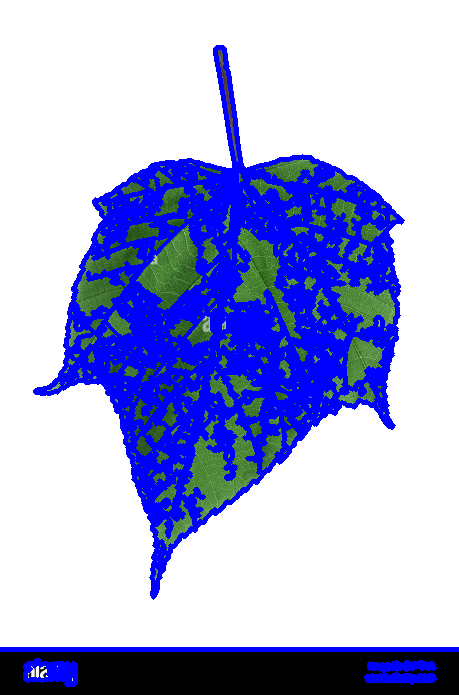

In [55]:
# Klasifikasi dengan Random Forest

img_leaf = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Leaf/Acer_Capillipes/Acer_Capillipes.jpg')

# resize gambar input
scale_percent = 50 # percent of original size
width = int(img_leaf.shape[1] * scale_percent / 100)
height = int(img_leaf.shape[0] * scale_percent / 100)
dim = (width, height)
img_leaf = cv.resize(img_leaf, dim)
image_gray = cv.cvtColor(img_leaf, cv.COLOR_BGR2GRAY)

# Menerapkan Canny Edge Detection
edged = cv.Canny(image_gray, 30, 200)

# Menerapkan fungsi findContours() openCV
contours, hierarchy = cv.findContours(edged, 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(img_leaf, contours, -1, (255, 0, 0), 3)

# Menghitung area input gambar
area = np.array([[0]])
for i in range(edged.shape[0]):
  for j in range(edged.shape[1]):
    if(edged[i,j] > 0):
      area[0][0] += 1

# Prediksi Bentuk Daun
print(predict_leaf(area))
# print(predict_leaf_knn(area))
print(area)

cv2_imshow(img_leaf)

Acer_Capillipes
[[482]]


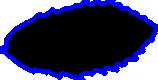

In [56]:
# Klasifikasi dengan KNN

img_leaf2 = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/Leaf/Castanea_Sativa/Castanea_Sativa.jpg')

# resize gambar input
scale_percent = 50 # percent of original size
width = int(img_leaf2.shape[1] * scale_percent / 100)
height = int(img_leaf2.shape[0] * scale_percent / 100)
dim = (width, height)
img_leaf2 = cv.resize(img_leaf2, dim)
image_gray = cv.cvtColor(img_leaf2, cv.COLOR_BGR2GRAY)

# Menerapkan Canny Edge Detection
edged = cv.Canny(image_gray, 30, 200)

# Menerapkan fungsi findContours() openCV
contours, hierarchy = cv.findContours(edged, 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(img_leaf2, contours, -1, (255, 0, 0), 3)

# Menghitung area input gambar
area = np.array([[0]])
for i in range(edged.shape[0]):
  for j in range(edged.shape[1]):
    if(edged[i,j] > 0):
      area[0][0] += 1

# Prediksi Bentuk Daun
print(predict_leaf_knn(area))
print(area)

cv2_imshow(img_leaf2)

In [57]:
# Load All Images

leaf1 = []
leaf2 = []
leaf3 = []
leaf1_gray = []
leaf2_gray = []
leaf3_gray = []

images = [leaf1, leaf2, leaf3]
images_gray = [leaf1_gray, leaf2_gray, leaf3_gray]

for i in range(3):
  load_image(images[i], path_image[i], 1)
  load_image(images_gray[i], path_image[i], 0)

In [58]:
# Canny Edge Detection

edged_image_leaf = images_gray.copy()
for i in range(len(edged_image_leaf)):
  for j in range(len(edged_image_leaf[0])):
    edged_image_leaf[i][j] = cv.Canny(edged_image_leaf[i][j], 30, 200)

In [59]:
# Membuat Contours (Garis Tepi)

contours = [ [ None for y in range( len(edged_image_leaf[0]) ) ] for x in range( len(edged_image_leaf) ) ]
hierarchy = [ [ None for y in range( len(edged_image_leaf[0]) ) ] for x in range( len(edged_image_leaf) ) ]
for i in range(len(edged_image_leaf)):
  for j in range(len(edged_image_leaf[0])):
    images[i][j] = cv.cvtColor(images[i][j], cv.COLOR_BGR2RGB)
    contours[i][j], hierarchy[i][j] = cv.findContours(edged_image_leaf[i][j], 
        cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    cv.drawContours(images[i][j], contours[i][j], -1, (255, 0, 0), 3)

In [60]:
# Data area

area = [ [ 0 for y in range( len(edged_image_leaf[0]) ) ] for x in range( len(edged_image_leaf) ) ]

for i in range(len(edged_image_leaf)):
  for j in range(len(edged_image_leaf[0])):
    for y in range(edged_image_leaf[i][j].shape[0]):
      for x in range(edged_image_leaf[i][j].shape[1]):
        if(edged_image_leaf[i][j][y][x] > 0):
          area[i][j] += 1

In [61]:
# Labeling (Data test)

label1 = [0] * len(area[0])
label2 = [1] * len(area[0])
label3 = [2] * len(area[0])

label = np.concatenate((label1, label2))
label = np.concatenate((label, label3))

data = []
for i in range(len(area)):
  for j in range(len(area[0])):
    data.append(area[i][j])

data = np.stack((data, label), axis=1)
df_test = pd.DataFrame(data, columns=["Area", "Label"])
df_test

,Area,Label
0,24624,0
1,922,0
2,931,0
3,956,0
4,910,0
5,943,0
6,912,0
7,921,0
8,937,0
9,925,0


In [62]:
# X test dan Y test

X_test = df_test.iloc[:,0].values
X_test = X_test.reshape(-1,1)
Y_test = df_test.iloc[:,1].values

Model Test Accuracy Score : 
93.93939393939394%


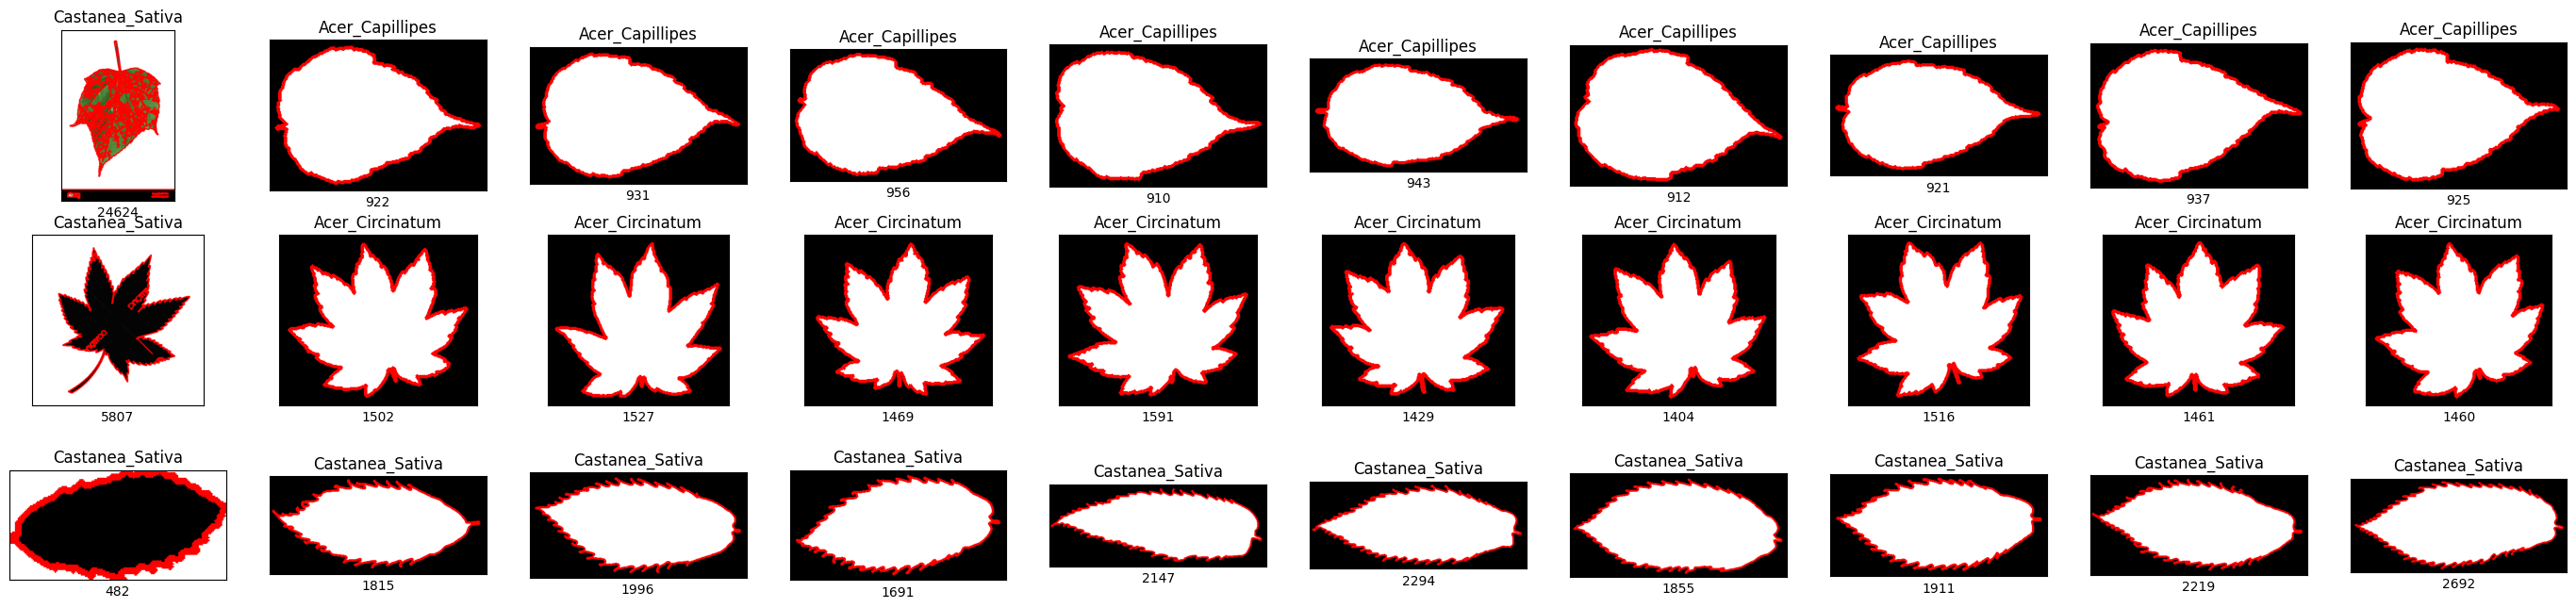

In [63]:
# Prediksi data test dengan Random Forest

predict_random_forest = [ [ "" for y in range( len(edged_image_leaf[0]) ) ] for x in range( len(edged_image_leaf) ) ]

for i in range(len(predict_random_forest)):
  for j in range(len(predict_random_forest[0])):
    predict_random_forest[i][j] = predict_leaf([[area[i][j]]])

print('Model Test Accuracy Score : ')
print(str(accuracy_score(Y_test, rfc.predict(X_test)) * 100)+ '%')

# Membuat figure
fig = plt.figure(figsize=(35, 8))

# setting jumlah baris dan kolom
rows = 3
columns = 10

# add subplot
index = 1
for i in range(rows):
  for j in range(columns):
    fig.add_subplot(rows, columns, index)
    plt.title(predict_random_forest[i][j])
    plt.xlabel(area[i][j])
    plt.imshow(images[i][j])
    plt.xticks([]),plt.yticks([])
    index += 1
plt.show()